Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

Reading the csv data

In [2]:
# Load dataset
data = pd.read_csv('drug200.csv')
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugC
1   47   M     LOW        HIGH   13.093  DrugC
2   47   M     LOW        HIGH   10.114  DrugC
3   28   F  NORMAL        HIGH    7.798  DrugX
4   61   F     LOW        HIGH   18.043  DrugY


univariate analysis


checking the distribution(normal or skewed)

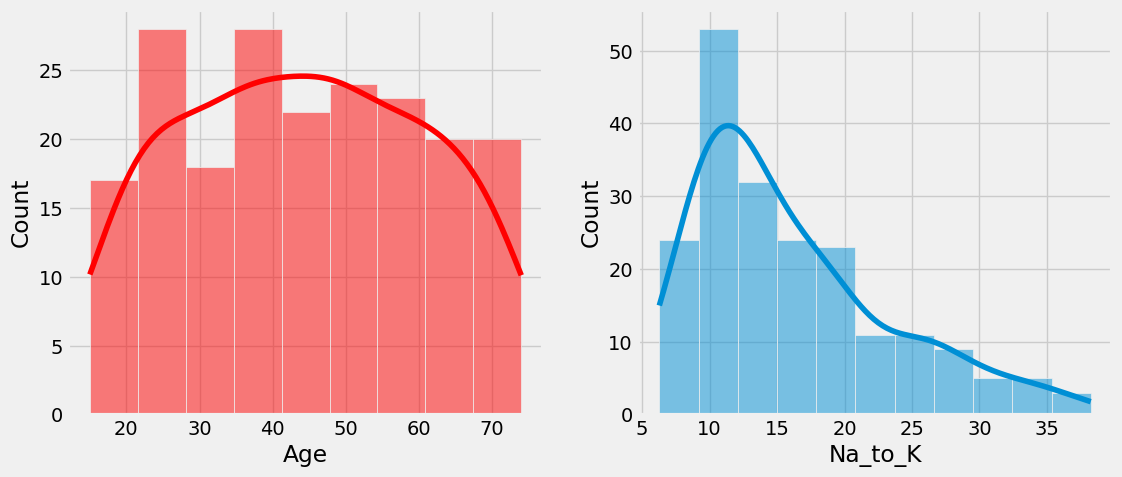

In [3]:

# Visualize the distribution of features
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(data['Age'], color='r', kde=True)
plt.subplot(122)
sns.histplot(data['Na_to_K'], kde=True)
plt.show()

creating a data frame with categorical

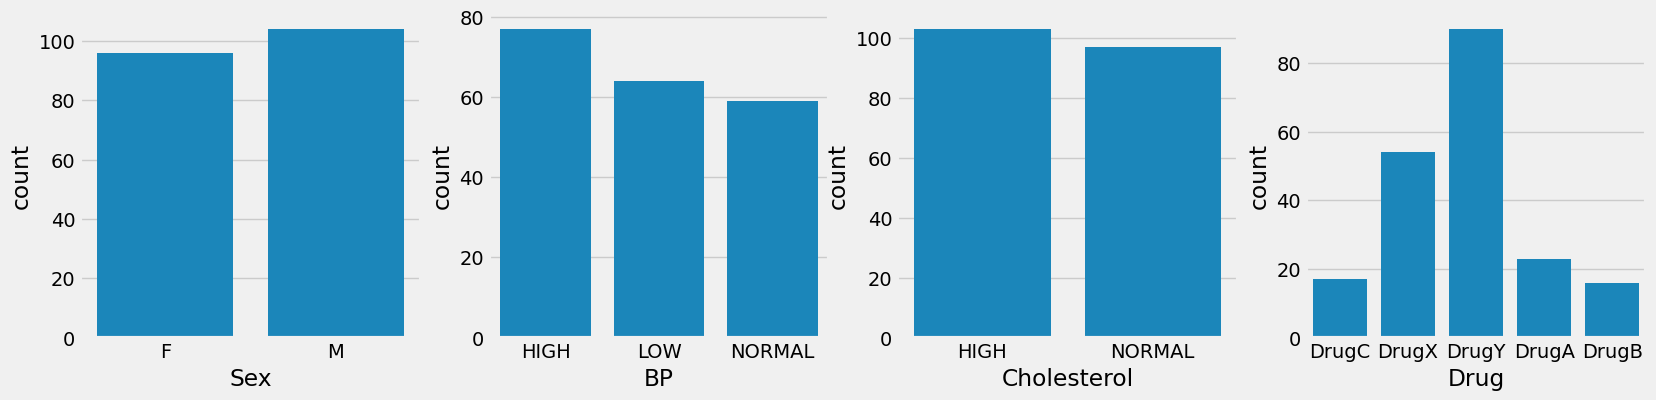

In [4]:
# Visualize categorical features
data_cat = data.select_dtypes(include='object')
plt.figure(figsize=(18, 4))
for i, j in enumerate(data_cat.columns):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=data[j])
plt.show()

Visualizing the count of categorical variable


Bivariate analysis
visualizing the realtion b/n drug,BP,sex&Cholestrol

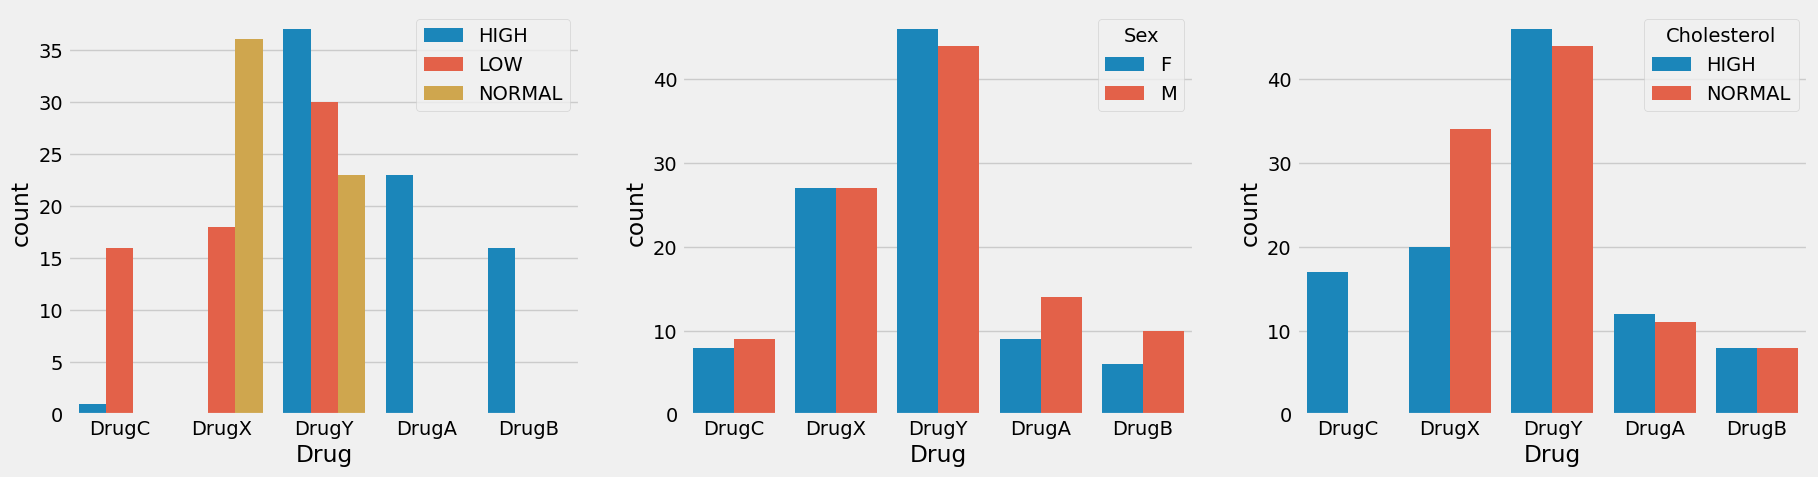

               Age  Sex    BP Cholesterol     Na_to_K   Drug
count   200.000000  200   200         200  200.000000    200
unique         NaN    2     3           2         NaN      5
top            NaN    M  HIGH        HIGH         NaN  DrugY
freq           NaN  104    77         103         NaN     90
mean     44.315000  NaN   NaN         NaN   16.084485    NaN
std      16.544315  NaN   NaN         NaN    7.223956    NaN
min      15.000000  NaN   NaN         NaN    6.269000    NaN
25%      31.000000  NaN   NaN         NaN   10.445500    NaN
50%      45.000000  NaN   NaN         NaN   13.936500    NaN
75%      58.000000  NaN   NaN         NaN   19.380000    NaN
max      74.000000  NaN   NaN         NaN   38.247000    NaN
(200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-nul

In [5]:

# Crosstab visualization
plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.countplot(x=data['Drug'], hue=data['BP'])
plt.legend(loc='upper right')
plt.subplot(132)
sns.countplot(x=data['Drug'], hue=data['Sex'])
plt.subplot(133)
sns.countplot(x=data['Drug'], hue=data['Cholesterol'])
plt.show()

# Descriptive statistics
print(data.describe(include='all'))
print(data.shape)
print(data.info())
print(data.isnull().sum())

Handling outliers

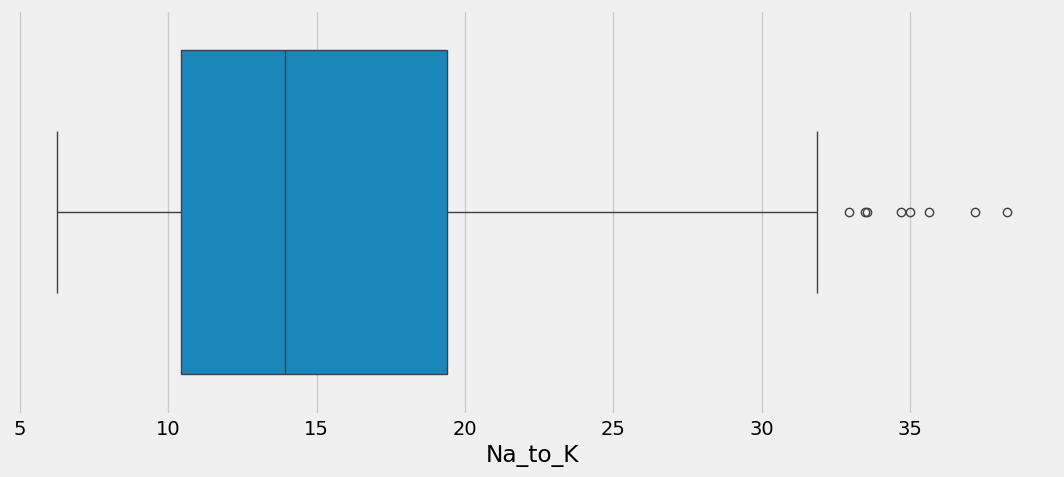

In [6]:
# Boxplot and outlier detection
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Na_to_K'])
plt.show()

# Outlier removal
q1 = np.quantile(data['Na_to_K'], 0.25)
q3 = np.quantile(data['Na_to_K'], 0.75)
IQR = q3 - q1
upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)
data = data[(data['Na_to_K'] >= lower_bound) & (data['Na_to_K'] <= upper_bound)]

In [7]:

# Log transformation
data['Na_to_K'] = np.log(data['Na_to_K'])

# Encoding categorical variables
data['BP'] = data['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Cholesterol'] = data['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})

In [8]:

# Splitting data
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (134, 5)
Shape of y_train: (134,)
Shape of x_test: (58, 5)
Shape of y_test: (58,)


In [9]:
# Model training and evaluation functions
def decisionTree(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    print('**DecisionTreeClassifier**')
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
    print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

In [10]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print('**RandomForestClassifier**')
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
    print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

In [11]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('**KNeighborsClassifier**')
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
    print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

In [12]:

def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train, y_train)
    y_pred = xg.predict(x_test)
    print('**GradientBoostingClassifier**')
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
    print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

In [13]:

def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

compareModel(x_train, x_test, y_train, y_test)

**DecisionTreeClassifier**
Confusion matrix
[[ 7  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 25]]
Classification report
              precision    recall  f1-score   support

       DrugA       1.00      1.00      1.00         7
       DrugB       1.00      1.00      1.00         2
       DrugC       1.00      1.00      1.00         4
       DrugX       1.00      1.00      1.00        20
       DrugY       1.00      1.00      1.00        25

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Cohen Kappa Score: 1.0
Matthews Correlation Coefficient: 1.0
----------------------------------------------------------------------------------------------------
**RandomForestClassifier**
Confusion matrix
[[ 7  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 25]]
Classification report
              precision    recall  

In [14]:

# Selecting and saving the best model (RandomForestClassifier)
rf = RandomForestClassifier()
rf.fit(x_train, y_train) 
y_pred = rf.predict(x_test)
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

F1 Score: 1.0


In [15]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rf, X, y, cv=5)
print('Cross-validation mean score:', np.mean(cv))

Cross-validation mean score: 0.9843454790823213


In [16]:

pickle.dump(rf, open('model.pkl', 'wb'))